## 자치구 및 인구 수 대비 쓰레기통 개수 현황

### 요약


 서울특별시 내 면적당 쓰레기통 개수와 1인당 쓰레기통 개수를 분석한 결과, 면적당 쓰레기통 개수는 최대 25개(강남구)에서 최저 3개(광진구, 강동구, 금천구)로 큰 차이를 보였습니다. 또한 1인당 쓰레기통 개수는 최대 4.1개(중구)에서 최저 1.36(서초구)로 나타났습니다.

서울 내 거리 쓰레기통은 1995년 쓰레기 종량제 도입 이후 대부분이 없어졌습니다. 이유는 가정 쓰레기를 거리 쓰레기통에 몰래 버리는 경우가 발생하여 쓰레기통을 없앴기 때문입니다. 하지만 최근 일부 지역에서 쓰레기통이 필요하다는 민원을 제기하여 다시 쓰레기통이 늘어나기 시작했습니다.

일본 도쿄는 1995년 도쿄 지하철 사린가스 살포 사건 이후 거리 쓰레기통을 없앴습니다. 미국 뉴욕시도 쓰레기통을 줄인 결과, 일부 지역에서 쓰레기가 증가하고 위생 문제가 발생했습니다. 이런 상황은 시민의식에 영향을 미치는 것을 보여줍니다.

이러한 문제 해결을 위해 서울시와 뉴욕시는 다양한 방안을 모색하고 있습니다. 뉴욕시는 쓰레기통 디자인을 바꾸거나 용량을 늘리는 등의 방법을 고려하고 있으며, 서울시도 쓰레기 문제에 대한 대책을 마련하고 있는 상황입니다.

데이터 분석 결과와 다양한 도시의 사례를 통해 쓰레기통 문제는 환경과 시민의식에 관련된 복잡한 문제임을 알 수 있습니다. 이를 해결하기 위해서는 적절한 대책과 시민들의 협력이 필요한 것으로 나타났습니다.

 
### 관련 기사
 
 [늘려도, 줄여도 골칫덩이… '거리의 문제아' 쓰레기통](https://www.chosun.com/site/data/html_dir/2019/11/05/2019110500138.html)

### 필요한 라이브러리 불러오기

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

import requests
import folium

### 데이터 로드하기

#### 서울시 가로휴지통 설치 정보 (2022.04)
- **출처:** 서울 열린데이터 광장
- **기관:** 기후환경본부 자원회수시설추진단 생활환경과
- **주소:** [서울 열린데이터 광장 - 가로휴지통 설치 정보](https://kosis.kr/statHtml/statHtml.do?orgId=106&tblId=DT_106N_29_2020005&conn_path=I2)

#### 서울시 행정구역 (구별) 통계 (2022.06)
- **출처:** 서울 열린데이터 광장
- **기관:** 서울특별시 행정국 자치행정과
- **주소:** [서울 열린데이터 광장 - 서울시 행정구역 (구별) 통계](https://data.seoul.go.kr/dataList/412/S/2/datasetView.do)

#### 서울시 주민등록인구 (연령별/구별) 통계 (2022.04)
- **출처:** 서울 열린데이터 광장
- **기관:** 서울특별시 디지털정책관
- **주소:** [서울 열린데이터 광장 - 서울시 주민등록인구 (연령별/구별) 통계](https://kosis.kr/statHtml/statHtml.do?orgId=106&tblId=DT_106N_29_2020005&conn_path=I2)

### 데이터 미리보기

In [83]:
garbage_count_path = './dataset/seoul_garbage_count.xlsx'
dimension_path = './dataset/seoul_gu_dimensions.csv'
population_path = './dataset/seoul_gu_population.csv'


garbage_count_file = pd.read_excel(garbage_count_path)
dimension_file = pd.read_csv(dimension_path)
population_file = pd.read_csv(population_path)

In [16]:
garbage_count_file

,Unnamed: 0,서울시 가로쓰레기통 현황\n (2021.6월 기준),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,연번,자치구명,도로명,세부 위치(상세 주소),설치 지점,수거 쓰레기 종류(일반 쓰레기 / 재활용 쓰레기)
1,NaN,1,종로구,사직로,경복궁역 4번출구,지하철역 입구,일반쓰레기
2,NaN,2,종로구,사직로,경복궁역 4번출구,지하철역 입구,재활용
3,NaN,3,종로구,자하문로,자하문로 28,도로(가로)변,일반쓰레기
4,NaN,4,종로구,자하문로,자하문로 28,도로(가로)변,재활용
...,...,...,...,...,...,...,...
5371,NaN,5371,도봉구,해등로,해등로3길 41,삼환빌라 앞 횡단보도,⑥ 횡단보도 입구
5372,NaN,5372,도봉구,해등로,해등로 103,창원초등학교 앞 횡단보도,⑥ 횡단보도 입구
5373,NaN,5373,도봉구,도봉산길,도봉산길 27,도봉고등학교 건너편 횡단보도,⑥ 횡단보도 입구
5374,NaN,5374,도봉구,도봉로,도봉동 620-23,신도봉사거리 도봉중학교방향 횡단보도,⑥ 횡단보도 입구


In [65]:
dimension_file

,자치구별(1),자치구별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5
0,자치구별(1),자치구별(2),면적,면적,동,동,통 (개),반 (개)
1,자치구별(1),자치구별(2),면적 (km²),구성비 (%),행정 (개),법정 (개),소계,소계
2,서울시,소계,605.21,100.00,426,467,12881,96502
3,서울시,종로구,23.91,3.95,17,87,279,1475
4,서울시,중구,9.96,1.65,15,74,253,1582
5,서울시,용산구,21.87,3.61,16,36,357,2601
6,서울시,성동구,16.82,2.78,17,17,471,3645
7,서울시,광진구,17.06,2.82,15,7,370,3012
8,서울시,동대문구,14.22,2.35,14,10,360,2629
9,서울시,중랑구,18.50,3.06,16,6,558,4232


In [66]:
population_file

,동별(1),동별(2),항목,2023 1/4,2023 1/4.1,2023 1/4.2,2023 1/4.3,2023 1/4.4,2023 1/4.5,2023 1/4.6,...,2023 2/4.12,2023 2/4.13,2023 2/4.14,2023 2/4.15,2023 2/4.16,2023 2/4.17,2023 2/4.18,2023 2/4.19,2023 2/4.20,2023 2/4.21
0,동별(1),동별(2),항목,계,계,계,계,계,계,계,...,계,계,계,계,계,계,계,계,계,계
1,동별(1),동별(2),항목,소계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
2,합계,소계,계,9668008,227792,318362,364760,393817,615813,845503,...,707994,735093,598180,415728,313541,226310,106811,35886,8150,1532
3,합계,소계,한국인,9426404,223600,312530,360436,388258,575672,807658,...,687323,720743,591757,413214,312716,225890,106545,35769,8100,1495
4,합계,소계,외국인,241604,4192,5832,4324,5559,40141,37845,...,20671,14350,6423,2514,825,420,266,117,50,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,합계,송파구,한국인,658006,18628,26754,29356,28759,35557,51153,...,46644,48875,40958,27031,18368,11317,5574,2185,499,96
76,합계,송파구,외국인,5698,94,138,83,67,276,641,...,620,379,165,52,20,8,5,2,1,0
77,합계,강동구,계,464027,13721,18584,20133,19173,23872,34222,...,33632,37661,31089,20703,14010,8772,4039,1546,348,82
78,합계,강동구,한국인,459982,13649,18478,20043,19095,23678,33712,...,33234,37376,30980,20655,13994,8770,4037,1544,348,81


### 데이터 전처리

In [92]:
selected_data = garbage_count_file[['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5']]

columns_name = selected_data.iloc[0]

selected_data = selected_data.iloc[1:]

selected_data.columns = columns_name

selected_data['자치구명'] = selected_data['자치구명'].apply(lambda x: x + '구' if not x.endswith('구') else x)

garbage_location = selected_data.reset_index(drop=True)

garbage_location.head()

,자치구명,도로명,세부 위치(상세 주소),설치 지점
0,종로구,사직로,경복궁역 4번출구,지하철역 입구
1,종로구,사직로,경복궁역 4번출구,지하철역 입구
2,종로구,자하문로,자하문로 28,도로(가로)변
3,종로구,자하문로,자하문로 28,도로(가로)변
4,종로구,자하문로,자하문로 44,도로(가로)변


In [94]:
garbage_count = garbage_location['자치구명'].value_counts()
garbage_count = {'자치구명': garbage_count.index, '쓰레기통 개수': garbage_count.values}
garbage_count = pd.DataFrame(garbage_count)

garbage_count.head()

,자치구명,쓰레기통 개수
0,강남구,976
1,구로구,292
2,서대문구,290
3,강서구,287
4,도봉구,280


In [93]:
selected_data = dimension_file[['자치구별(2)', '2022']]
dimension = selected_data.iloc[3:]
dimension.columns = ['자치구명', '면적(km²)']

dimension.reset_index(drop=True).head()

,자치구명,면적(km²)
0,종로구,23.91
1,중구,9.96
2,용산구,21.87
3,성동구,16.82
4,광진구,17.06


In [95]:
filtered_data = population_file[population_file["항목"] == "계"]
filtered_data = filtered_data.iloc[1:]
population = filtered_data[['동별(2)', '2023 2/4.21']]
population.columns = ['자치구명', '인구 수']

population.reset_index(drop=True).head()

,자치구명,인구 수
0,종로구,36
1,중구,30
2,용산구,61
3,성동구,50
4,광진구,44


### 데이터 병합

In [96]:
data = pd.merge(garbage_count, dimension, on='자치구명')
data = pd.merge(data, population, on='자치구명')
data.head()

,자치구명,쓰레기통 개수,면적(km²),인구 수
0,강남구,976,39.50,92
1,구로구,292,20.12,52
2,서대문구,290,17.63,60
3,강서구,287,41.45,82
4,도봉구,280,20.65,65


### 데이터 조합

In [134]:
data = pd.merge(garbage_count, dimension, on='자치구명')
data = pd.merge(data, population, on='자치구명')

data['쓰레기통 개수'] = data['쓰레기통 개수'].astype(float)
data['면적(km²)'] = data['면적(km²)'].astype(float)
data['인구 수'] = data['인구 수'].astype(int)

data['면적당 쓰레기통 개수'] =  data['쓰레기통 개수'] / data['면적(km²)']
data['면적당 쓰레기통 개수'] = data['면적당 쓰레기통 개수'].round().astype(int)

data['1인당 쓰레기통 개수'] =  data['인구 수'] / data['면적(km²)']
data['1인당 쓰레기통 개수'] = data['1인당 쓰레기통 개수'].round(2)
data.head()

,자치구명,쓰레기통 개수,면적(km²),인구 수,면적당 쓰레기통 개수,1인당 쓰레기통 개수
0,강남구,976.0,39.50,92,25,2.33
1,구로구,292.0,20.12,52,15,2.58
2,서대문구,290.0,17.63,60,16,3.40
3,강서구,287.0,41.45,82,7,1.98
4,도봉구,280.0,20.65,65,14,3.15


### 최종 데이터

In [118]:
garbage_location

,자치구명,도로명,세부 위치(상세 주소),설치 지점
0,종로구,사직로,경복궁역 4번출구,지하철역 입구
1,종로구,사직로,경복궁역 4번출구,지하철역 입구
2,종로구,자하문로,자하문로 28,도로(가로)변
3,종로구,자하문로,자하문로 28,도로(가로)변
4,종로구,자하문로,자하문로 44,도로(가로)변
...,...,...,...,...
5370,도봉구,해등로,해등로3길 41,삼환빌라 앞 횡단보도
5371,도봉구,해등로,해등로 103,창원초등학교 앞 횡단보도
5372,도봉구,도봉산길,도봉산길 27,도봉고등학교 건너편 횡단보도
5373,도봉구,도봉로,도봉동 620-23,신도봉사거리 도봉중학교방향 횡단보도


In [135]:
data

,자치구명,쓰레기통 개수,면적(km²),인구 수,면적당 쓰레기통 개수,1인당 쓰레기통 개수
0,강남구,976.0,39.50,92,25,2.33
1,구로구,292.0,20.12,52,15,2.58
2,서대문구,290.0,17.63,60,16,3.40
3,강서구,287.0,41.45,82,7,1.98
4,도봉구,280.0,20.65,65,14,3.15
5,용산구,269.0,21.87,61,12,2.79
6,서초구,250.0,46.97,64,5,1.36
7,강북구,247.0,23.60,55,10,2.33
8,마포구,239.0,23.85,59,10,2.47
9,은평구,233.0,29.71,59,8,1.99


## 데이터 시각화

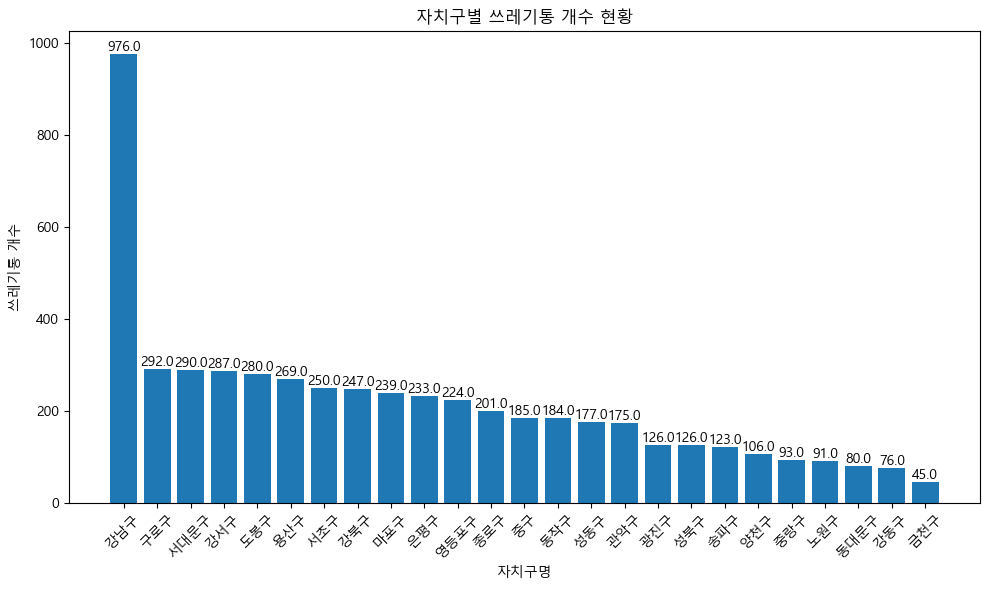

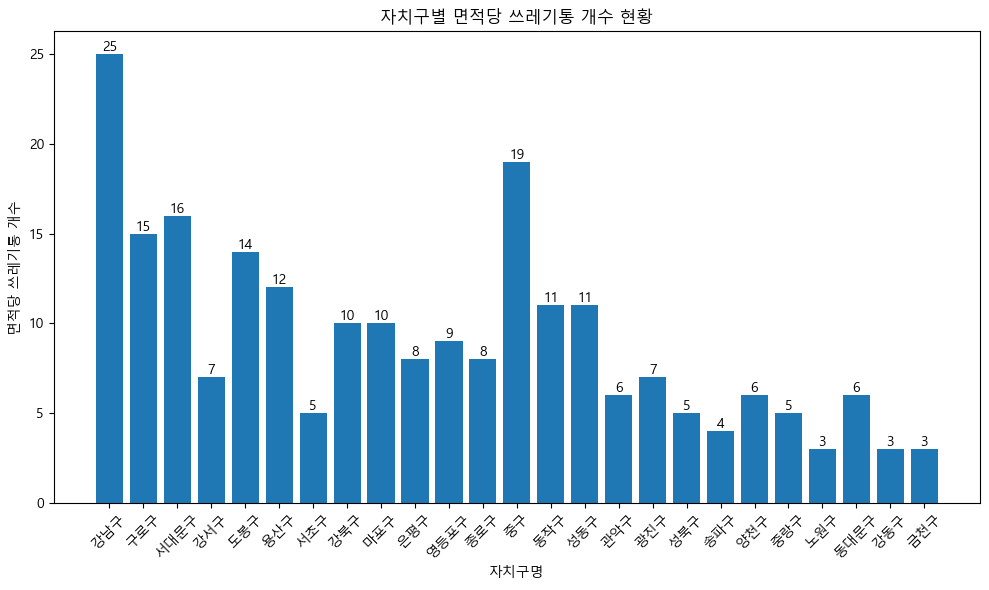

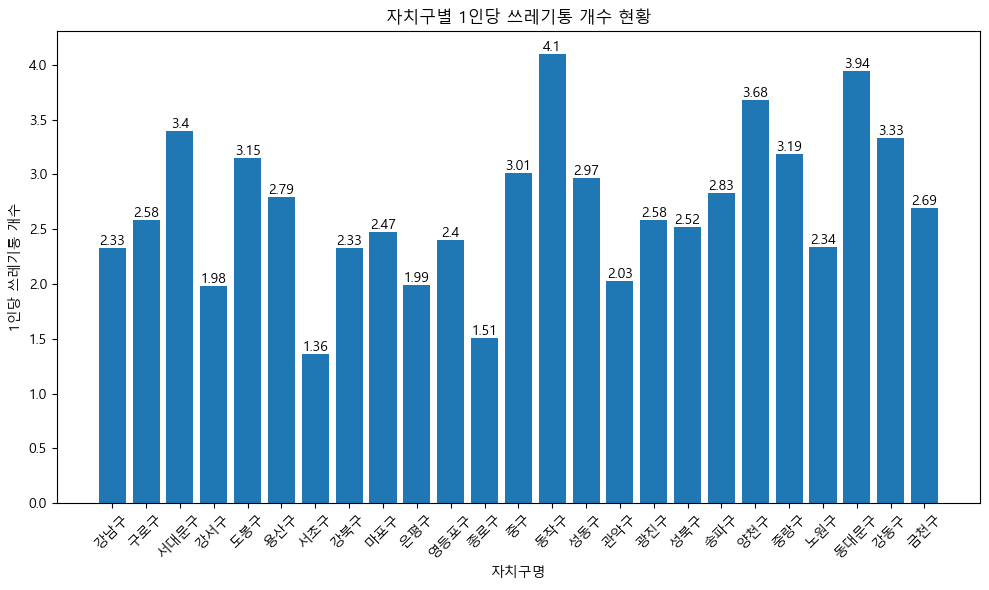

In [136]:
plt.figure(figsize=(10, 6))
bars = plt.bar(data['자치구명'], data['쓰레기통 개수'])

for bar in bars:
    yval = bar.get_height()
    plt.text((bar.get_x() + bar.get_width()/2), yval, yval, va='bottom', ha='center')

plt.title('자치구별 쓰레기통 개수 현황')
plt.xlabel('자치구명')
plt.ylabel('쓰레기통 개수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
bars = plt.bar(data['자치구명'], data['면적당 쓰레기통 개수'])

for bar in bars:
    yval = bar.get_height()
    plt.text((bar.get_x() + bar.get_width()/2), yval, yval, va='bottom', ha='center')

plt.title('자치구별 면적당 쓰레기통 개수 현황')
plt.xlabel('자치구명')
plt.ylabel('면적당 쓰레기통 개수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
bars = plt.bar(data['자치구명'], data['1인당 쓰레기통 개수'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, va='bottom', ha='center')

plt.title('자치구별 1인당 쓰레기통 개수 현황')
plt.xlabel('자치구명')
plt.ylabel('1인당 쓰레기통 개수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [127]:
per = 50
selected_data = []

for i in range(0, len(garbage_location), per):
    doc = garbage_location.iloc[i:i+per]
    selected_data.append(doc.iloc[0])
    
selected_data = pd.DataFrame(selected_data).reset_index(drop=True)

    api_key = '구글 지오코딩 API 키'

    def geocode_address(address):
        base_url = 'https://maps.googleapis.com/maps/api/geocode/json'
        params = {'address': address, 'key': api_key}
        response = requests.get(base_url, params=params)
        data = response.json()
        if data['status'] == 'OK':
        location = data['results'][0]['geometry']['location']
        return location['lat'], location['lng']
    else:
        return None

    m = folium.Map(location=[37.5665, 126.9780], zoom_start=12)

    for index, row in selected_data.iterrows():
        address = str(row['세부 위치(상세 주소)']) + ', ' + str(row['도로명']) + ', ' + str(row['자치구명']) + ', 서울, 대한민국'
        location = geocode_address(address)
        if location:
            folium.Marker(location=location, popup=row['설치 지점']).add_to(m)


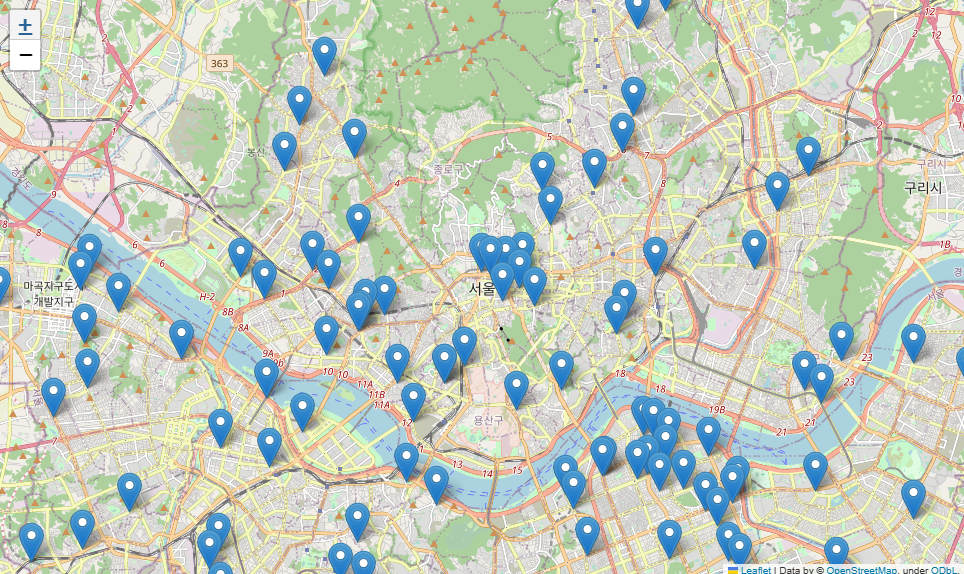